# Description
Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

# Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.



# Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Data Dictionary
RowNumber: Row number.
CustomerId: Unique identification key for different customers.
Surname: Surname of the customer
Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
Geography: The country to which the customer belongs.
Gender: The gender of the customer.
Age: Age of the customer.
Tenure: The period of time a customer has been associated with the bank.
Balance: The account balance (the amount of money deposited in the bank account) of the customer.
NumOfProducts: How many accounts, bank account affiliated products the person has.
HasCrCard: Does the customer have a credit card through the bank?
IsActiveMember: Subjective, but for the concept
EstimatedSalary: Estimated salary of the customer.
Exited: Did they leave the bank after all?

## Reading Dataset and Feature Elimination
- Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning

In [1]:
# Import 
!pip install tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# read file
data= pd.read_csv('/Users/aurelienvallier/Desktop/AI & Machine Learning/6- Neural Network/csv/bank.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

The dataset as 10k rows (subjects) and 14 features. It is a relatively big dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#No missing value.

In [6]:
#Let's confirm no missing value in each column
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


Great no missing values

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Mean and median of age column are  close to each other i.e. approx 37 and 38.9 respectively. Same for CreditScore and for Tenure and for Esimated Salary. This indicates a close to normal distribution.
- Estimated Salary seems pretty normally distributed (median close to mean, 25% quartile being close to one quarter of max, etc).
- On the other hand, this is not the case for Balance, NumOfProducts, HasCrCard, IsActiveMember. 
- Balance: mean significantly less than median, hence left skewed, hence probably a lot of 0 balance on the left sides (long left tails). Outliers on both sides detected which we will explore further
- NumOfProducts: clearly right skewed. A majority of clients with more than 1 products. 
- We can see that the target variable - Exited is imbalanced as most of the values are 0. 


## Features elimination
The customer ID and the Surname are both a unique identifier for each client and thus does not add value in data analysis. Similarly, Row Number is unique and does not help to explain our target variable. We will drop those 3 features

In [8]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


No only 11 features

## Perform an Exploratory Data Analysis on the data
- Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

In [9]:
#Let's define a function to create barplots for the categorical variables indicating percentage of each category for that variables.**
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    import seaborn as sns
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

In [10]:
# For categorical data, we cannot use directly bivariate analysis. Lets start by plotting them

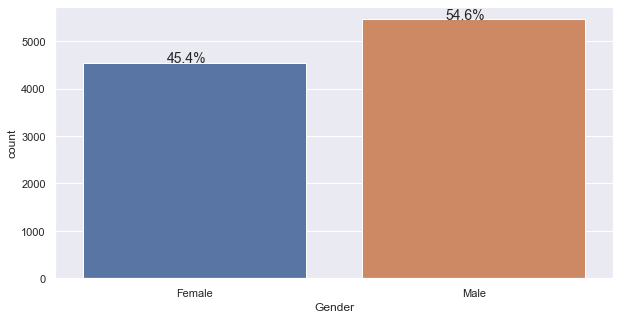

In [11]:
perc_on_bar(data.Gender)

More male than female

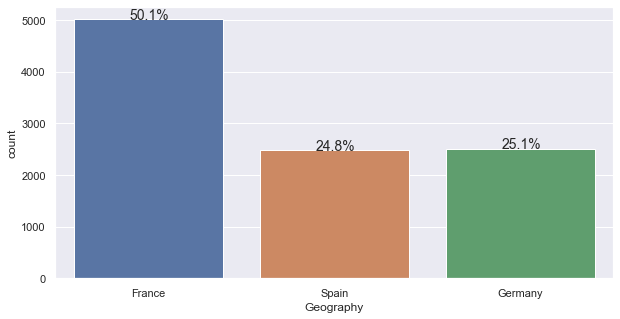

In [12]:
perc_on_bar(data.Geography)

Half of the customers from France, remaining evenly split from Spain and Germany

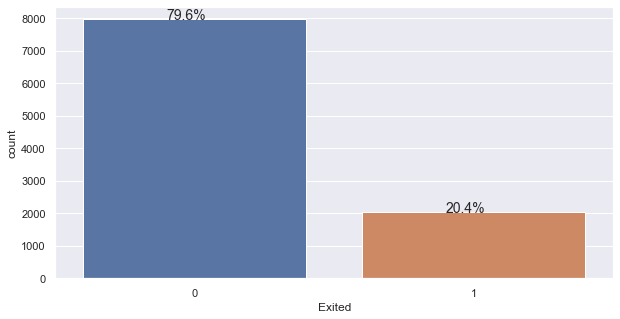

In [13]:
perc_on_bar(data.Exited)

We observe some class unbalance with exited being 20% only

In [14]:
##Bivariate Analysis
#The target variable is "Exited". 

In [15]:
import seaborn as sns

In [16]:
#sns.pairplot(data=data,hue='Exited')

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have taken the product and did not take the product.
- Let's explore this further with the help of other plots.

In [17]:
#Let's define one  function to plot stacked bar charts

In [18]:
# Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited     0     1    All
Age                      
18        20     2     22
19        26     1     27
20        38     2     40
21        50     3     53
22        72    12     84
..       ...   ...    ...
84         1     1      2
85         1     0      1
88         1     0      1
92         2     0      2
All     7963  2037  10000

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


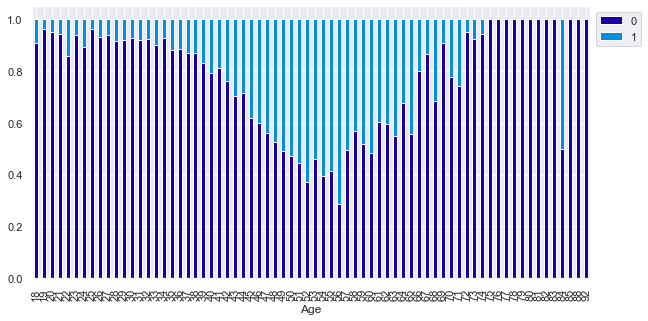

In [19]:
#Exited vs Age
stacked_plot(data.Age)

- The plot shows a V shape with minimum  reached in the mid 50's 
- Younger and on the opposite, older custimers are less likely to be exited
- One exception (84) but sample very small so might be outlier

Exited     0     1    All
Tenure                   
0        318    95    413
1        803   232   1035
2        847   201   1048
3        796   213   1009
4        786   203    989
5        803   209   1012
6        771   196    967
7        851   177   1028
8        828   197   1025
9        771   213    984
10       389   101    490
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


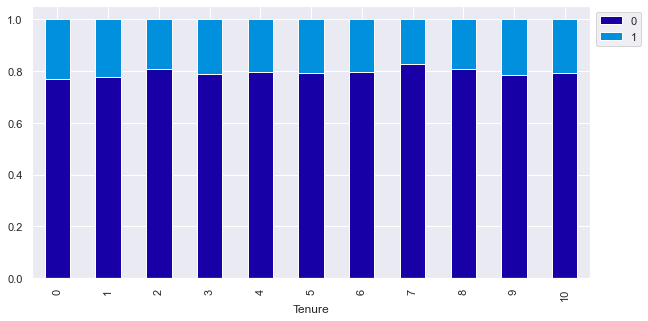

In [20]:
#Exited vs Tenure
stacked_plot(data.Tenure)

- Plot has somewhat of a reverse U shape.
- Higher churning at very early stage (less than 2 months) and when tenure is longer than 7 months 

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


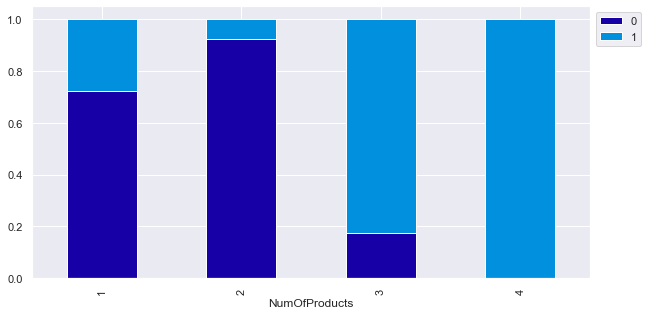

In [21]:
#Exited vs NumOfProducts
stacked_plot(data.NumOfProducts)

- Interestingly, proportion of churning much more important when have 3 or 4 products than 1 or 2. 
- Lets check if that is not due to sample of clients being too small for multi products clients

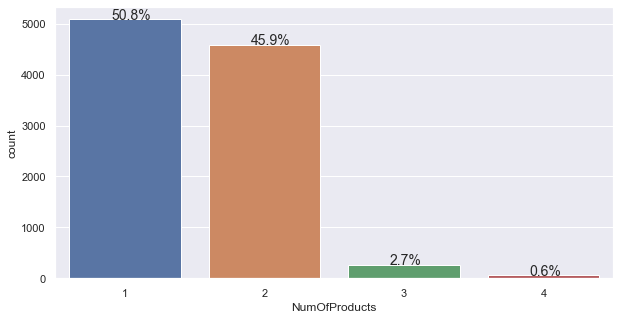

In [22]:
perc_on_bar(data.NumOfProducts)

- This shows that the above finding needs to be balanced, as most of the clients have 1 or 2 products and the number of clients having 3 or 4 products is very small,
- hence the sample of clients having 3 or 4 products might not be very representative

In [23]:
#Encoding of label variable 'gender', 'geography'
data= pd.get_dummies(data, columns=['Gender', 'Geography'])
pd.set_option('max_columns', None)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


Exited          0     1    All
Gender_Male                   
0            3404  1139   4543
1            4559   898   5457
All          7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


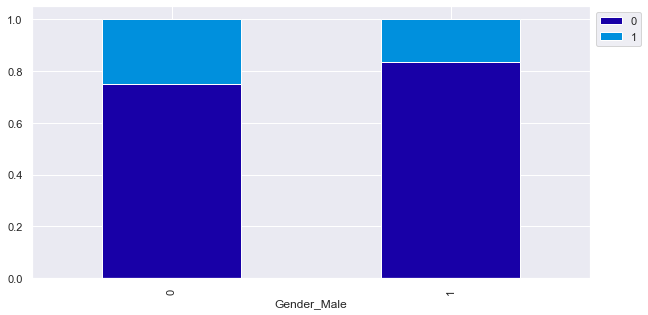

In [24]:
#Exited vs Gender Male and Female
stacked_plot(data.Gender_Male)

Interestingly we see the churning rate being higher for female than male

In [25]:
#Since every customer is either a male or a female, we will drop
#of the 2 features. 

In [26]:
data= data.drop('Gender_Female', axis=1)

In [27]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,0


Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


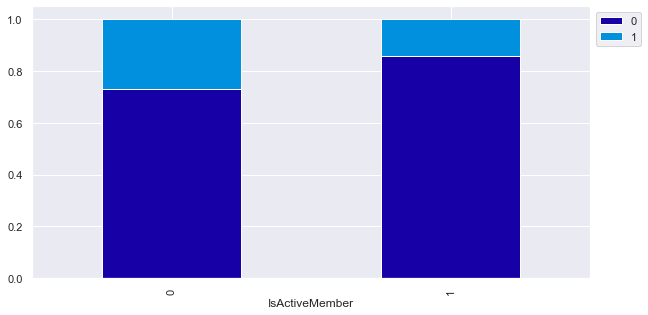

In [28]:
#Exited vs Active Member
stacked_plot(data.IsActiveMember)

Churning(light blue stack) reduced for active members. 

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


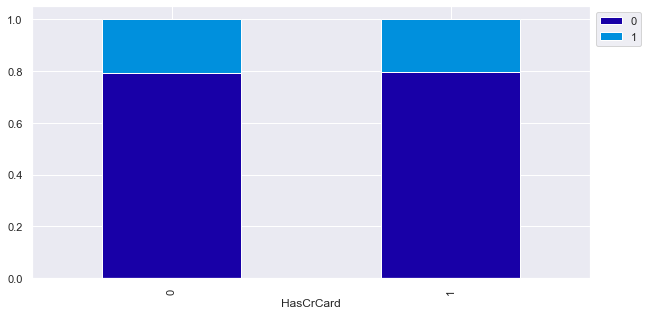

In [29]:
#Exited vs Credit Card Holder
stacked_plot(data.HasCrCard)

Limited influence of having a credit card in exit

Exited               0     1    All
Geography_France                   
0                 3759  1227   4986
1                 4204   810   5014
All               7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


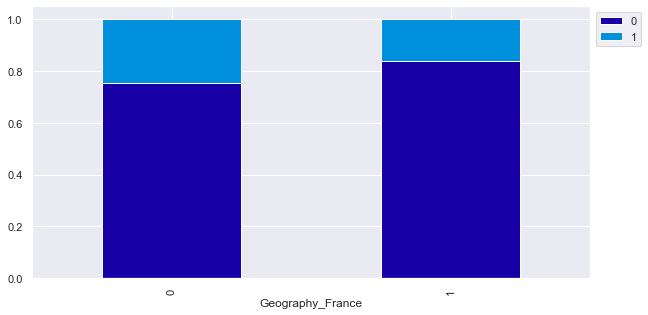

In [30]:
# Exited vs geographies
stacked_plot(data.Geography_France)

Exited                0     1    All
Geography_Germany                   
0                  6268  1223   7491
1                  1695   814   2509
All                7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


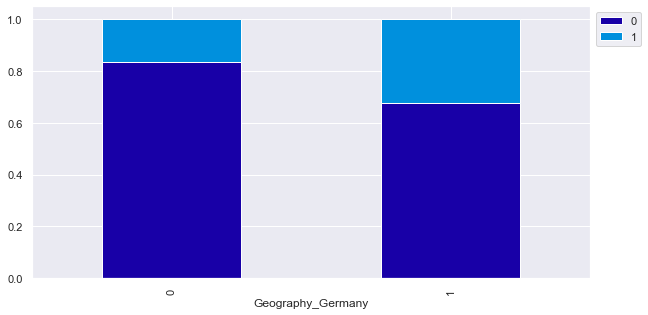

In [31]:
stacked_plot(data.Geography_Germany)

Exited              0     1    All
Geography_Spain                   
0                5899  1624   7523
1                2064   413   2477
All              7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


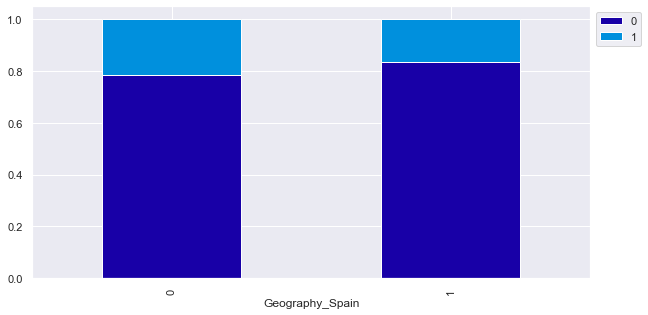

In [32]:
stacked_plot(data.Geography_Spain)

Interestingly, we observe the churning rate being higher for German (>30%) than French and Spanish (<20%).

In [33]:
# For bivariate analysis of Salary, Balance and Credit score we will use a boxplot since the data are 
# more continous (hence difficult to visualise using barchart)

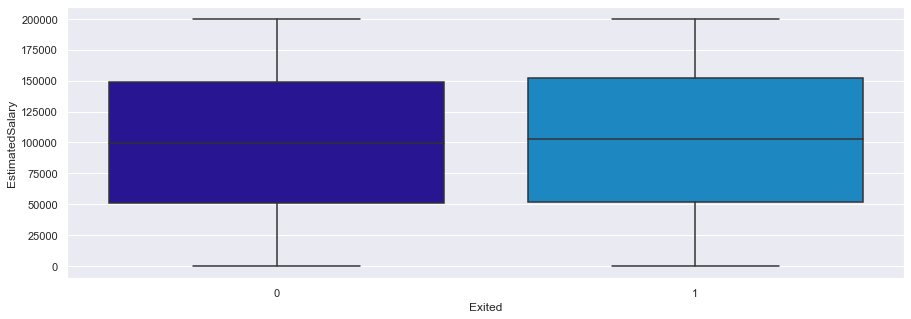

In [34]:
# Exited vs Salary
plt.figure(figsize=(15,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

Relatively similar distribution of salary among the exited and non exited

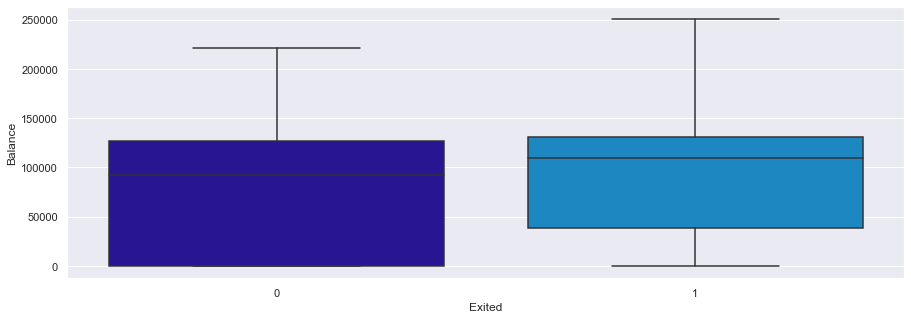

In [35]:
# Exited vs Balance
plt.figure(figsize=(15,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

Exited tend to have a higher median balance than those who do not exited and fewer 0 balance cases.

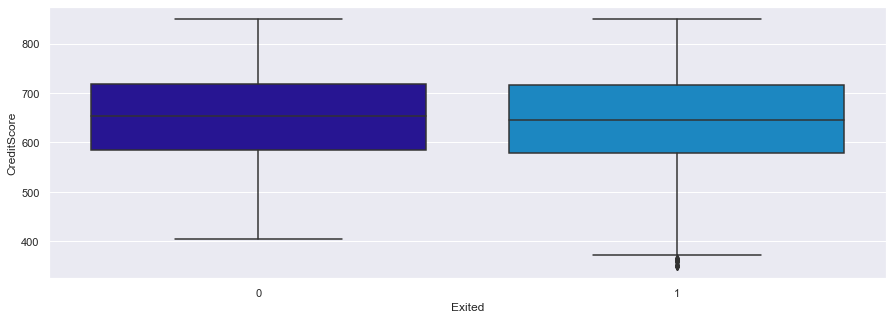

In [36]:
# Exited vs CreditScore
plt.figure(figsize=(15,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

- No major difference in distribution of credit score among exited and non exited. 
- Exited have slightly lower median average credit score and more outliers in the very low credit score range. 

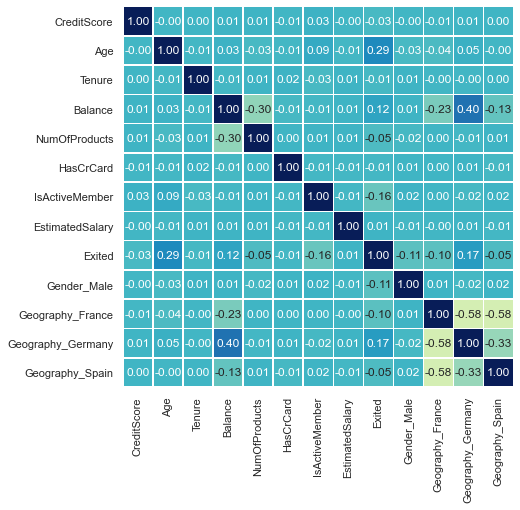

In [37]:
# Lets look at correlation heatmap
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

Overall limited correlation among the variables.
Target variable Exited has limited correlation with any of the features. The most significant one is age. 

## Illustrate the insights based on EDA
-Key meaningful observations from Bivariate analysis

In Summary:
- Churning slightly higher for female than male
- Churning higher for non active than active customers
- Having 2 products instead of 1 decrease the churning
- Exited tend to have a higher median balance than those who do not exited and fewer 0 balance cases.
- Country has an influence with more churning among German customers than French and Spanish
- Higher churning at very early stage (less than 2 months) and when tenure is longer than 7 months 

## Data Pre-processing
- Split the target variable and predictors - Split the data into train and test - Rescale the data

In [38]:
# Import  split sklearn.model_selection
from sklearn.model_selection import train_test_split


In [39]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [40]:
# Lets define X and y
X=data.drop(columns='Exited')
Y=data['Exited']

# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

Y_train =  np.array(Y_train)
Y_test =  np.array(Y_test)

In [41]:
# Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Model building
- Build Neural Network

Model 1

- We will start by using a simple NN made of 2 hidden layers fully-connected layers with ReLu activation. 
- There are 12 features so will use 12 nodes by layers
- Given the binary objectice, the final layer will output a probability distribution using sigmoid activation function and classify either as exited (0) or non exited (1).


In [42]:
#Lets import what we need to evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [43]:
#Import NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

ncols = X_train.shape[0]

# Initialize the constructor

model = Sequential()

# Add an first hidden layer 
model.add(Dense(12, activation='relu', kernel_initializer='normal')) # We choose 12 as there is 12 features

# second hidden layer
model.add(Dense(6, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron
model.add(Dense(1, activation='sigmoid'))    # We use sigmoid as result is binary and we want probability       

optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['Accuracy'])
                   

epochs = 50

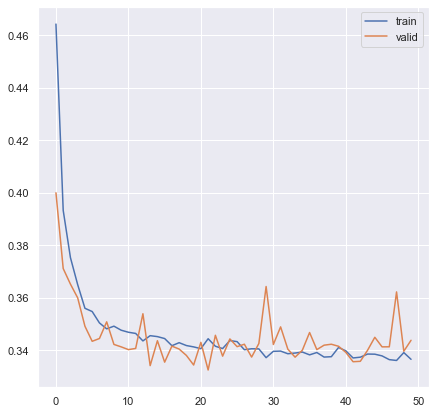

In [44]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)




Sharp reduction of training and validation loss until about 10 epochs. Then validation loss does not improve.

In [45]:
score = model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 645us/step - loss: 0.3448 - accuracy: 0.0000e+00


In [46]:
print(score)

[0.3447643220424652, 0.0]


## Model Performance Improvement
-Comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one

## Right Metric
The most important metrics is to make sure we dont miss out on predicting the customer who are actually going to churn. So the most important is to ensure that we do not predict that customer will not churn but he actually churn which would mean loosing a valuable customer. So recall is number one important criteria. We want to make sure we minimise the false negative. 

Making sure we do not chase client who will not churn is also important to make sure we do not waste money on the chasing. So Precision is number 2 criterias.



In [47]:
from sklearn.metrics import roc_auc_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve


In [48]:
roc_auc_score(Y, model.predict_proba(X))

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.5077664981097221

This is  a poor ROC_AUC score close to random prediction (0.5)

In [49]:
#Lets prepare confusion matrix to check recall
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

      

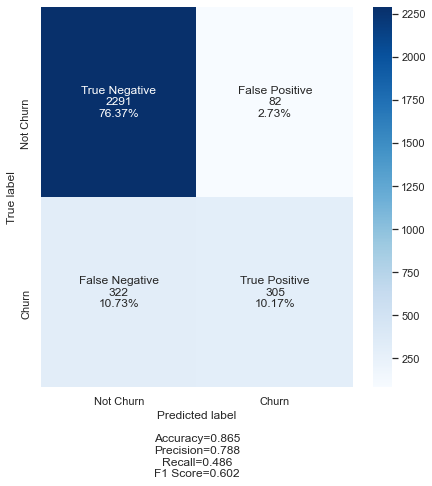

In [50]:
y_pred1 = model.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.5: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

We see here that if the threshold is set at 0,5 (to be considered as 1= churning), then the recall is very poor

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


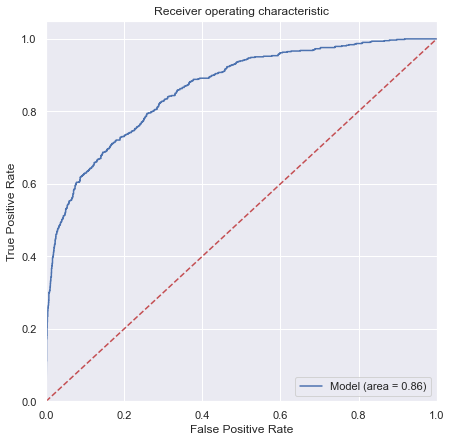

In [51]:
#Lets plot the ROC_AUC
model_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

From the above ROC-AUC plot and considering the current result (10% of true positive and 3.5% of false positive) we see that the we stand at the very beginning of the blue curve. The shape of the curve shows a very sharp increase of true positive up to x=.1. 

Considering that the priority is to identify the true positive and increasing false positive is not that damaging, we could aim for a recall of 0.85 which means a false positive of 0.5

Now we need to define the threshold that leads there.


## Changing the threshold

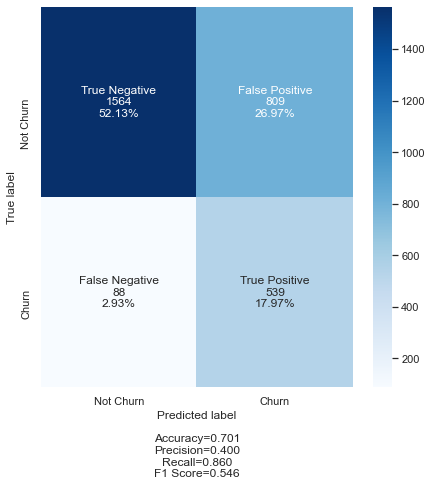

In [52]:
y_pred1 = model.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.1: #Threshold of 0.1 used
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Decreasing the threshold very significantly from 0.5 to 0.075 to achieve 86% recall. This is very damaging to the overall precision and accuracy of the model. We need to improve the model given its poor prediction value

## Can model performance be improved? check and comment 
We can try to improve the model by :

I) changing the structure : Model 2a (removing one hidden layer), model 2b (adding more neurons).

II) tuning the hyperparameters : model 3 a (changed in learning rate), model 3b ( change in activation function and optimizer). 

III) Threshold can be tuned to get the optimal value: we change threshold in best model accross 2a, 2b, 3a, 3b. 

IV) Re-balancing the class unbalance between exited and non exited. We change the weight in best model above.

## Build another model to implement these improvements - Include all the model which were trained to reach at the final one

# Model 2a)- We will remove one layer

In [53]:
# Initialize the constructor

model2a = Sequential()

# Add an first hidden layer 
model2a.add(Dense(12, activation='relu', kernel_initializer='normal')) 

# Second hidden layer removed
# Add an output layer with one neuron
model2a.add(Dense(1, activation='sigmoid'))    # We use sigmoid as result is binary and we want probability       

optimizer = tf.keras.optimizers.Adam(0.01)


model2a.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['accuracy'])
                   

epochs = 50

In [54]:
history = model2a.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)

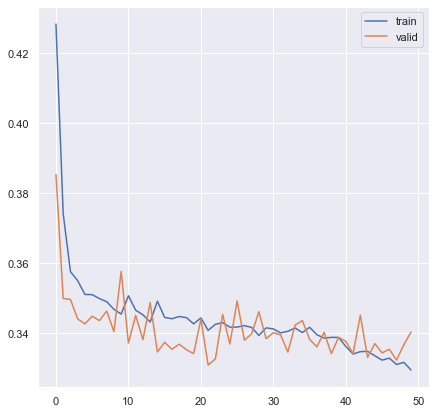

In [55]:
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)





In [56]:
score = model2a.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 669us/step - loss: 0.3466 - accuracy: 0.8587


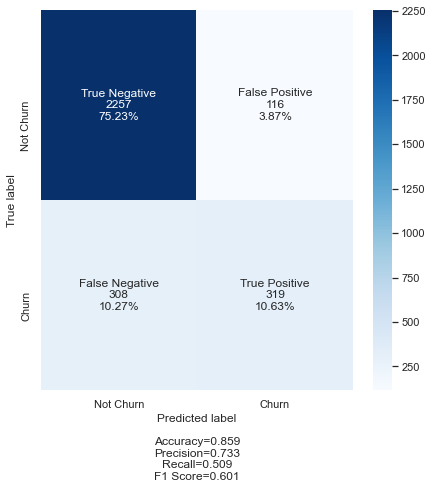

In [57]:
y_pred1 = model2a.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.5: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Conclusion model 2a (remove one layer)
Accuracy improve to .86, loss does not improve, recall improve slightly. 

# Model 2b : we take original model and change number of neurons

In [58]:
# Initialize the constructor

model2b = Sequential()

# Add an first hidden layer 
model2b.add(Dense(24, activation='relu', kernel_initializer='normal'))# we increase to 24 neurons

# second hidden layer
model2b.add(Dense(12, activation='relu', kernel_initializer='normal')) # we change to 12 neurons (from 6)


# Add an output layer with one neuron
model2b.add(Dense(1, activation='sigmoid'))    # We use sigmoid as result is binary and we want probability       

optimizer = tf.keras.optimizers.Adam(0.01)


model2b.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['accuracy'])
                   

epochs = 50

history = model2b.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)

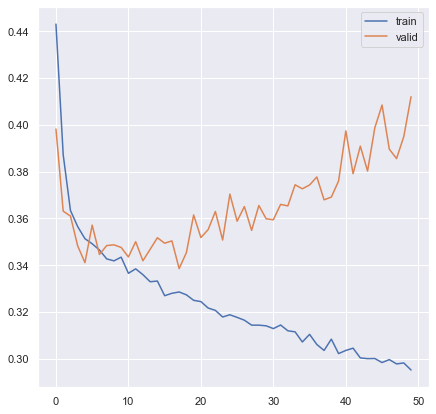

In [59]:
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [60]:
score = model2b.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 760us/step - loss: 0.4232 - accuracy: 0.8503


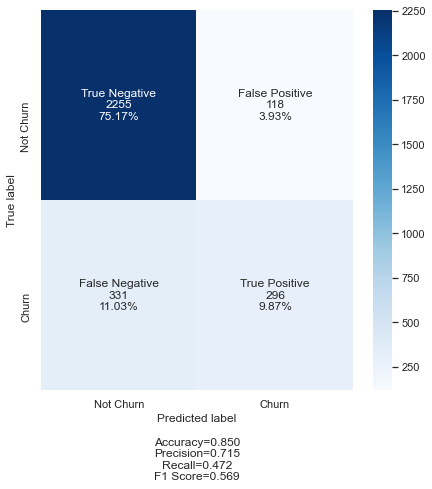

In [61]:
y_pred1 = model2b.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.5: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Conclusion 2b: Loss does not improve, recall does not improve and overfitting quicks in

# Model 3: we take model 1 but change the learning rate

In [62]:
# Initialize the constructor

model3a = Sequential()

# Add an first hidden layer 
model3a.add(Dense(12, activation='relu', kernel_initializer='normal'))

# second hidden layer
model3a.add(Dense(6, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron
model3a.add(Dense(1, activation='sigmoid'))   

optimizer = tf.keras.optimizers.Adam(0.001)# Changed was 0.01 previously


model3a.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['accuracy'])
                   

epochs = 50

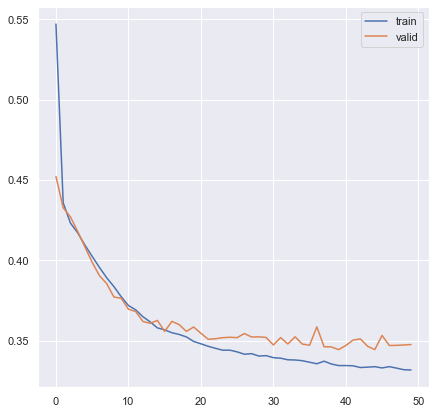

In [63]:
history = model3a.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)





In [64]:
score = model3a.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 737us/step - loss: 0.3518 - accuracy: 0.8540


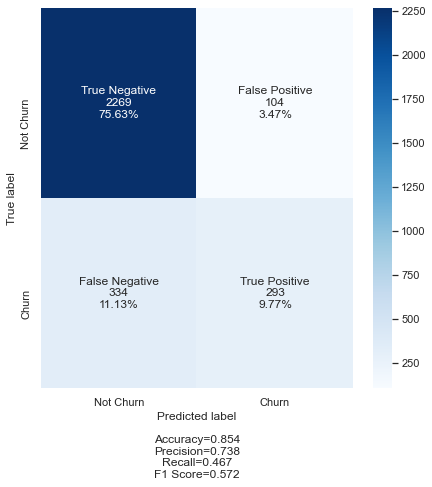

In [65]:
y_pred1 = model3a.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.5: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Decreasing the learning rate decrease the overfitting but does not improve the recall and does not reduce the loss

# Model 3b: change in activation function and optimizer

In [66]:
# Initialize the constructor

model3b = Sequential()

# Add an first hidden layer 
model3b.add(Dense(12, activation='tanh', kernel_initializer='normal')) # We changed to Tanh from Relu

# second hidden layer
model3b.add(Dense(6, activation='tanh', kernel_initializer='normal')) # We changed to Tanh from Relu


# Add an output layer with one neuron
model3b.add(Dense(1, activation='sigmoid'))       

optimizer = tf.keras.optimizers.Adam(0.01)


model3b.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['Accuracy'])
                   

epochs = 50

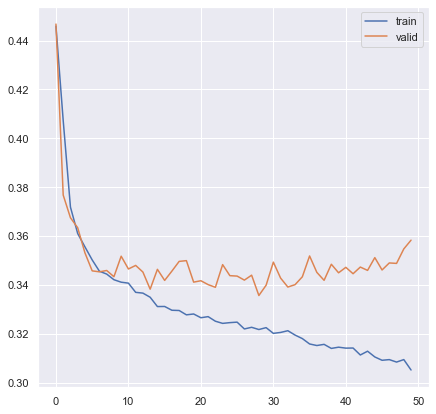

In [67]:
history = model3b.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)




In [68]:
score = model3b.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 636us/step - loss: 0.3713 - accuracy: 0.0000e+00


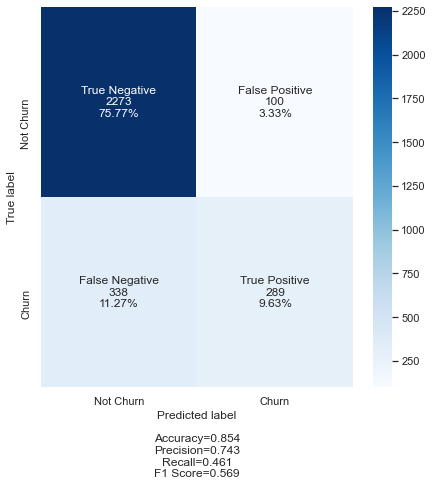

In [69]:
y_pred1 = model3b.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.5: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Accuracy and recall slightly improve but result remain quite poor if we keep the threshold at 0.5

# III) Threshold can be tuned to get the optimal value: we change threshold in best model accross 2a, 2b, 3a, 3b. 



Final version (model 2a_2): 
The model 2a which has the best results in terms of recall and overfitting. In this final version, we use model 2a and reduce the threshold (to increase the recall) and reduce the learning rate (from 0.01 to 0.005). This is a trial and error where we use the elements which so far have shown the best results

In [70]:
# Initialize the constructor

model2a_2 = Sequential()

# Add an first hidden layer 
model2a_2.add(Dense(12, activation='relu', kernel_initializer='normal')) 

# Second hidden layer removed
# Add an output layer with one neuron
model2a_2.add(Dense(1, activation='sigmoid'))    # We use sigmoid as result is binary and we want probability       

optimizer = tf.keras.optimizers.Adam(0.005) # We reduce the learning rate from 0.01 to 0.005


model2a_2.compile(loss='binary_crossentropy',
              optimizer=optimizer , metrics = ['accuracy'])
                   

epochs = 50

In [71]:
history = model2a_2.fit(X_train, Y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)

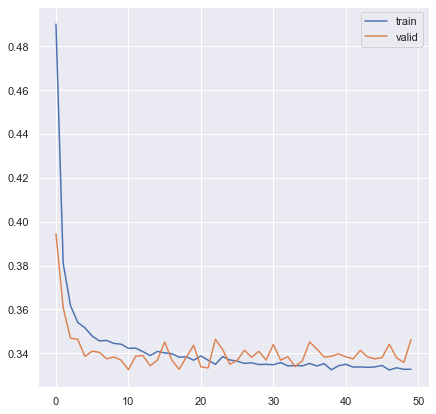

In [72]:
# Learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)




In [73]:
score = model2a_2.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 578us/step - loss: 0.3507 - accuracy: 0.8543


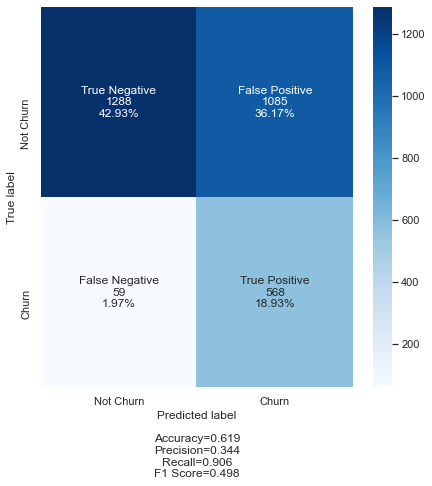

In [78]:
y_pred1 = model2a_2.predict(X_test)
for i in range(len(Y_test)):
    if y_pred1[i]>0.1: #Threshold of 0.5
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(Y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

If we change the threshold from 0.5 to 0.1, then the recall improves to reach .9. Accuracy reduces from .86 to .62 but the main objective is recall. 

## Model Performance Evaluation
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In summary:
- We have tested 6 DNN models (1, 2a, 2b, 3a, 3b and 2a_2) keeping in mind that the main metrics is recall. 
- All those models had in common to have a binary output through use a sigmoid function since the result is either client exited or not.
- All models were evaluated using recall, loss (cross entropy), accuracy and overfitting as main criterias.
- We have played around some hyperparameters (learning rate, activation functions), number of neurons, number of layers to check the results. To keep a structured approach in improving the models, we started all improvements from the same model 1 and made only one change each time. 
- The best performances in terms of recall, overfitting was model 2a_2, which is a tuned version of model 2a, i,e, only one hidden layer with 12 neurons (same as number of feature), relu as activation function, learning rate reduced to 0.005. 
- Model 2a_2, with a threshold of 0.5 could not get a very high recall rate. To increase it, we had to reduce the threshold to 0.1. This cost some accuracy as can be seen on the ROC_AUC curve but that was the main objective.

## Conclusion and key takeaways
- Final conclusion about the analysis

- Using DNN we are able to predict correctly up to 90% of the clients who effectively churn (recall rate using 0.1 threshold). The need to reduce significantly the threshold is related to the class imbalance (between churn and not churn).
- What the company can do to help fight churning is to take steps targeted in priority towards the more sensitive to churning namely: 
    - female customers 
    - increasing incentives for customers to be active customers (as non active have higher tendancy to churn) and incentivize the unique product user to have a second one (then they are less subject to churning)
    - Find ways to improve the customers experience particularly of German customers (more subject to churning than French and Spanish)
    - Take care of recent customers as churning is higher at very early stage